# Clustering Using DBSCAN

In [1]:
# importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the data
df = pd.read_csv("E:\\Datas\\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


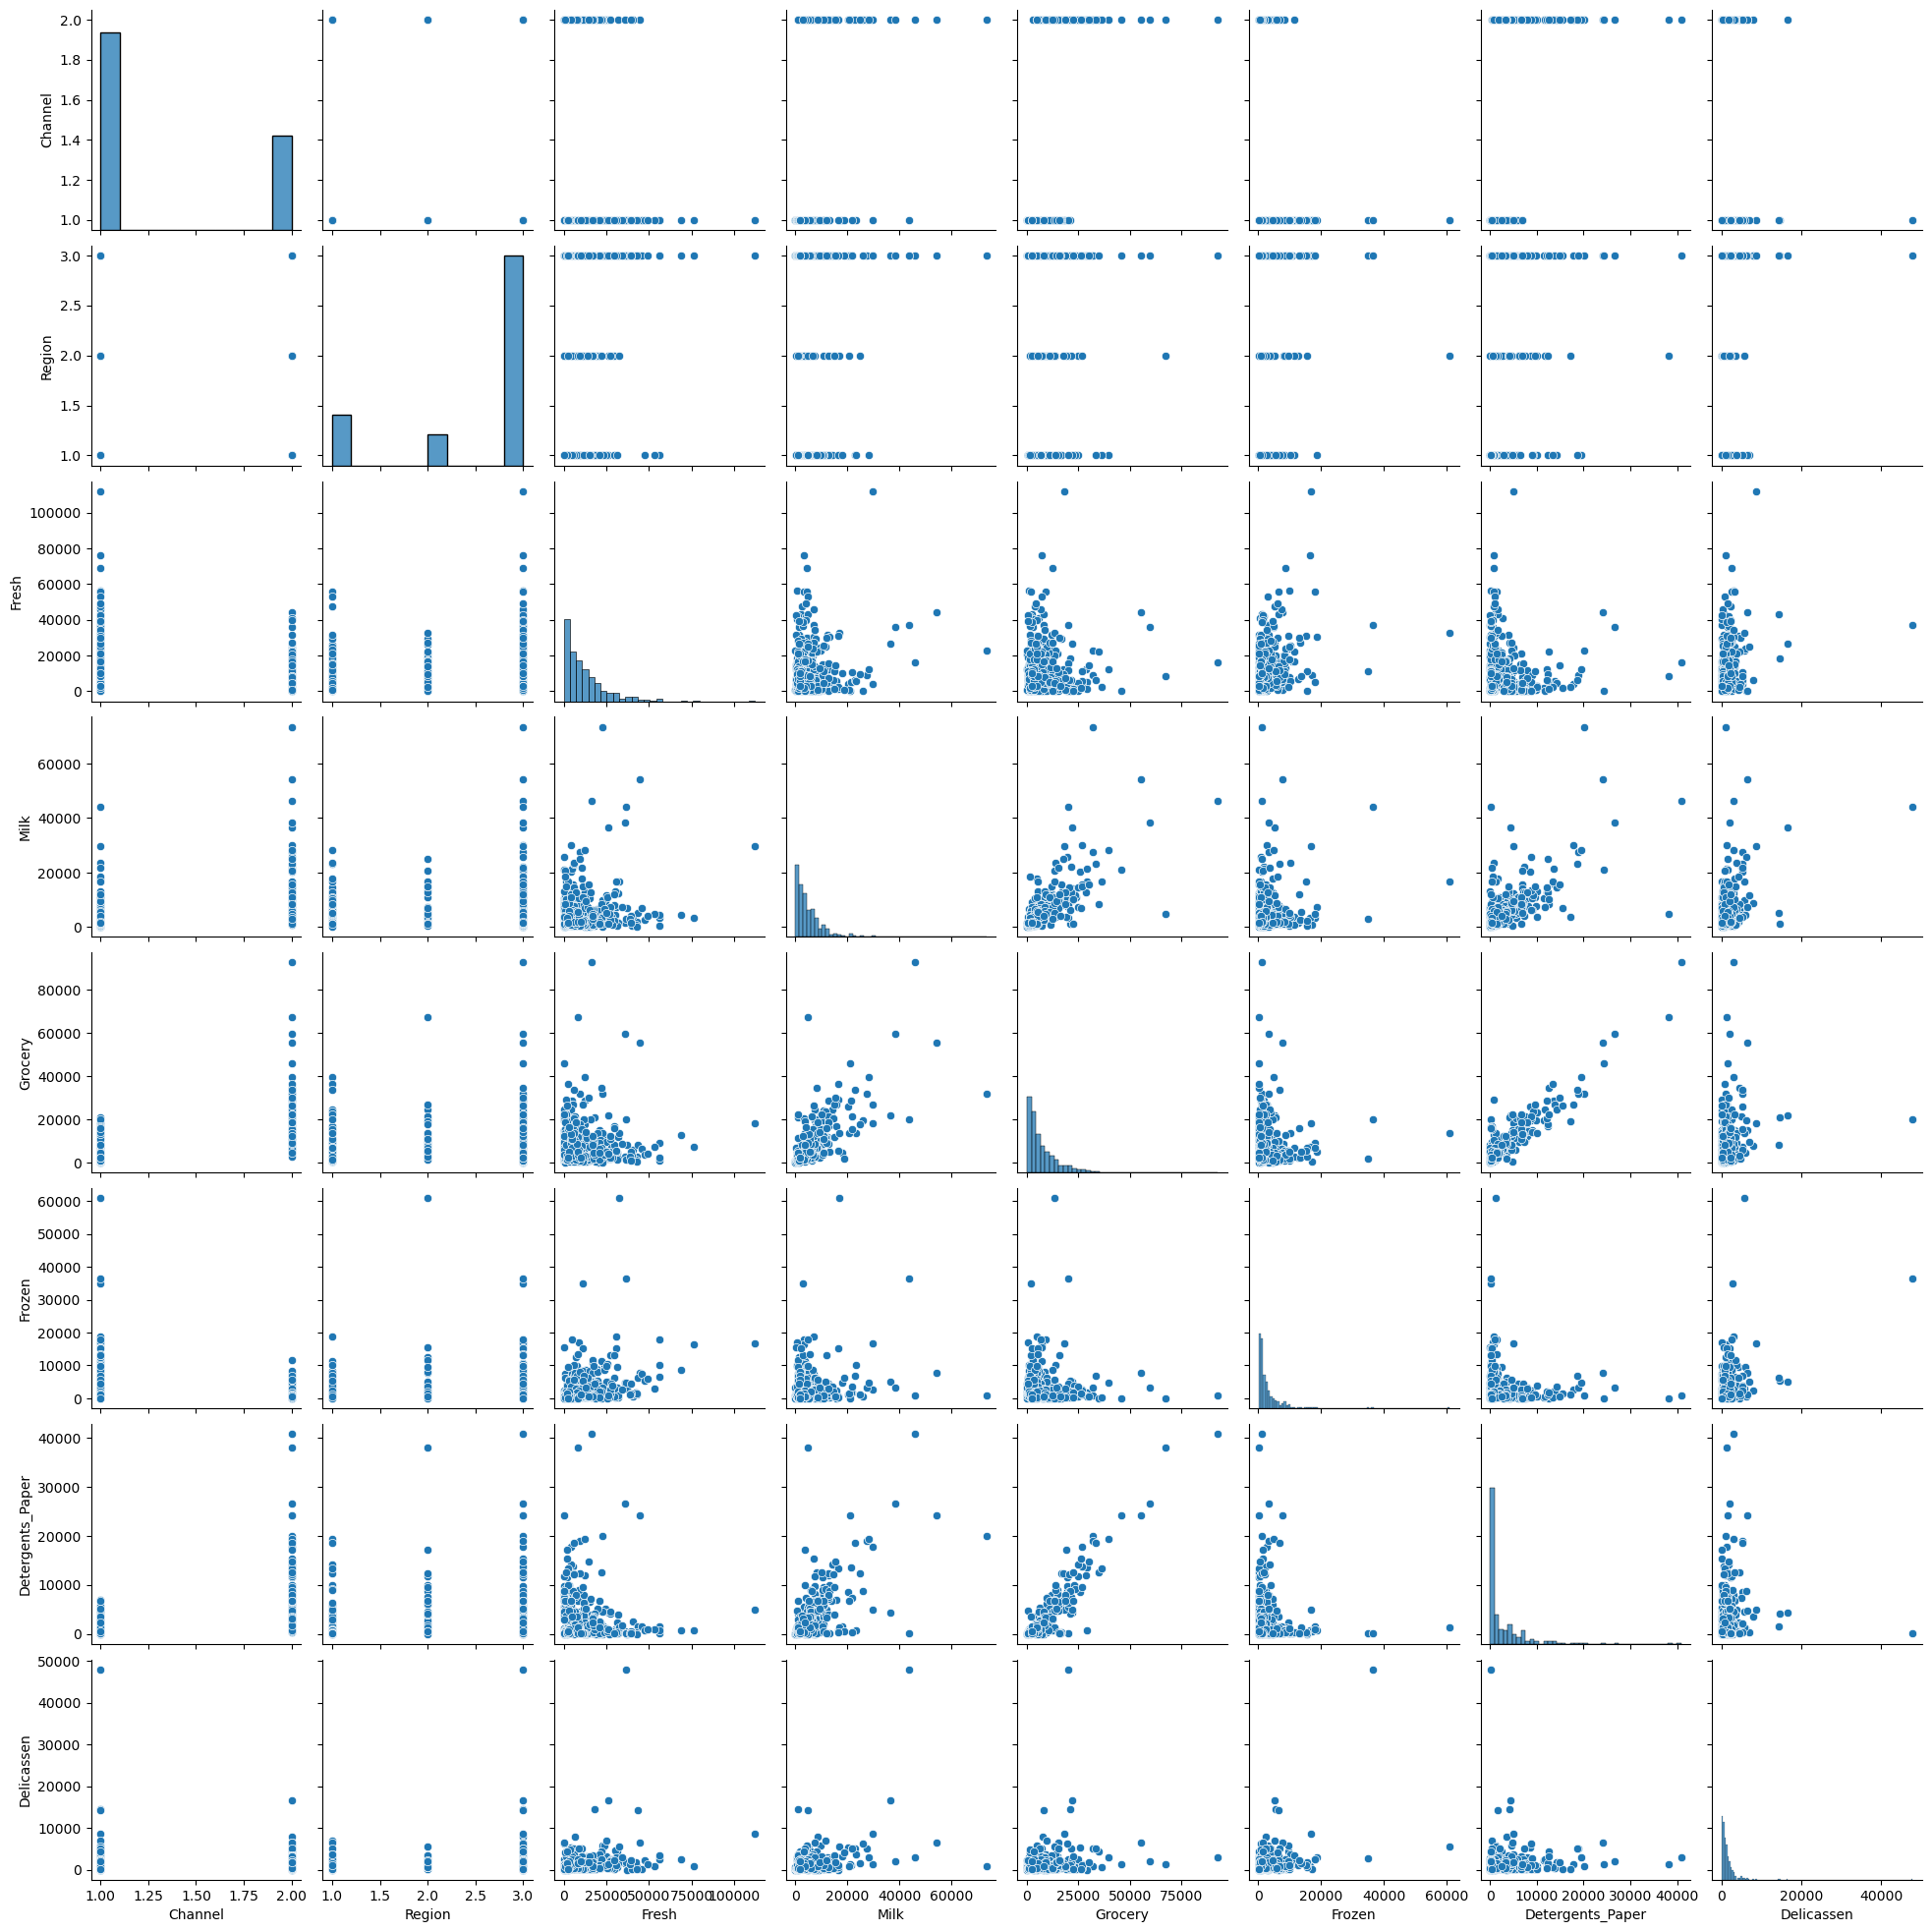

In [7]:
# pairplot
sns.pairplot(df)
plt.show()

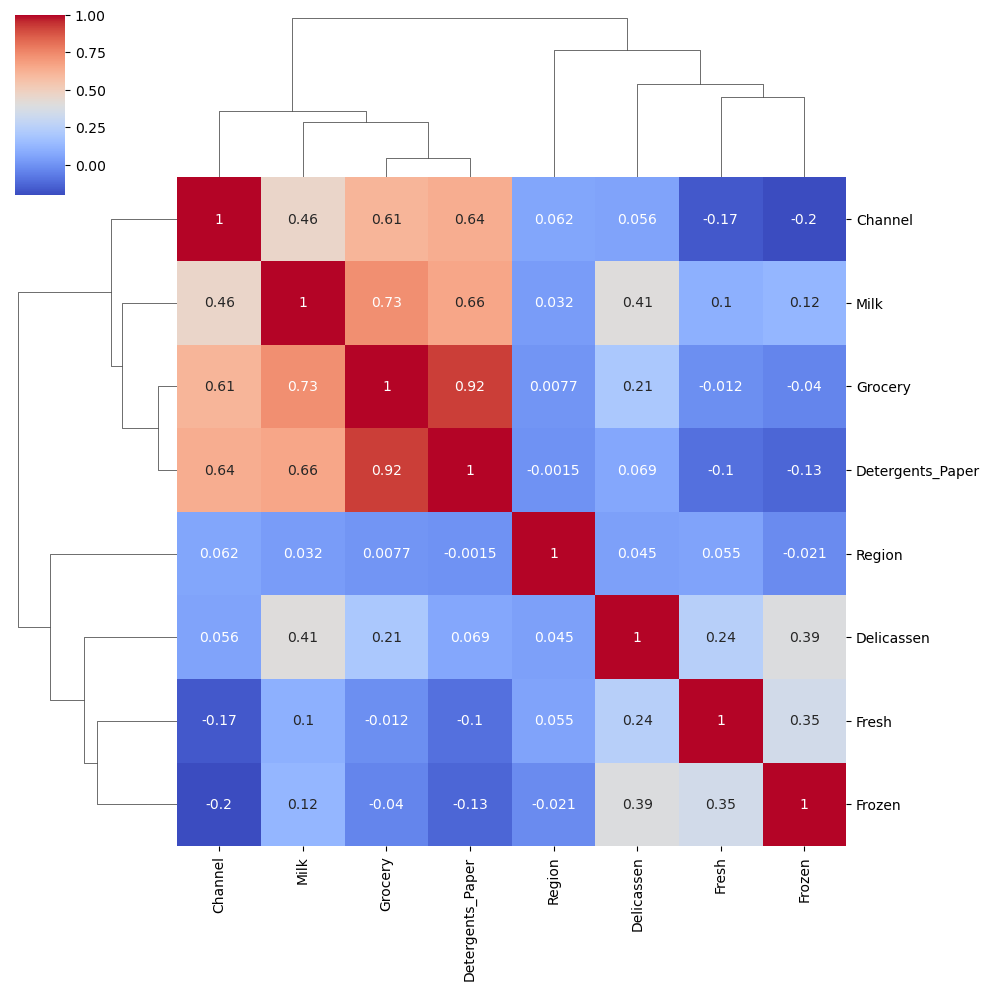

In [8]:
# Plotting clustermap which groups related features together.
sns.clustermap(df.corr(), annot=True, cmap='coolwarm') 
plt.show()

In [9]:
# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
# Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_scaled)

In [11]:
# Perform DBSCAN
eps = 7  # Epsilon parameter
min_samples = 5  # Minimum points to form a dense region (minpts)

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

from numpy import unique
dbscan_cluster = unique(clusters)
dbscan_cluster

array([-1,  0], dtype=int64)

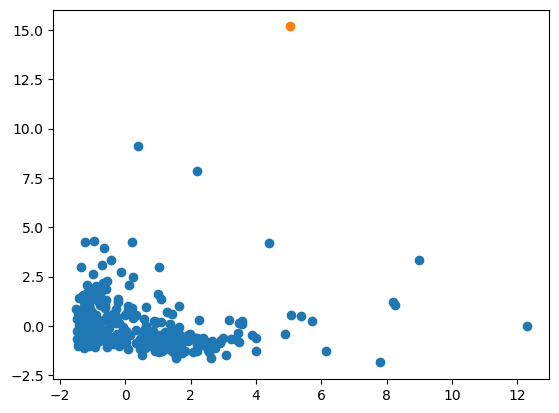

In [12]:
from numpy import where
# plot the DBSCAN clusters
for dbscan_cluster in set(clusters):
    # get data points that fall in this cluster
    index = where(clusters == dbscan_cluster)
    # make the plot
    plt.scatter(features_pca[index, 0], features_pca[index, 1])

# show the DBSCAN plot
plt.show()

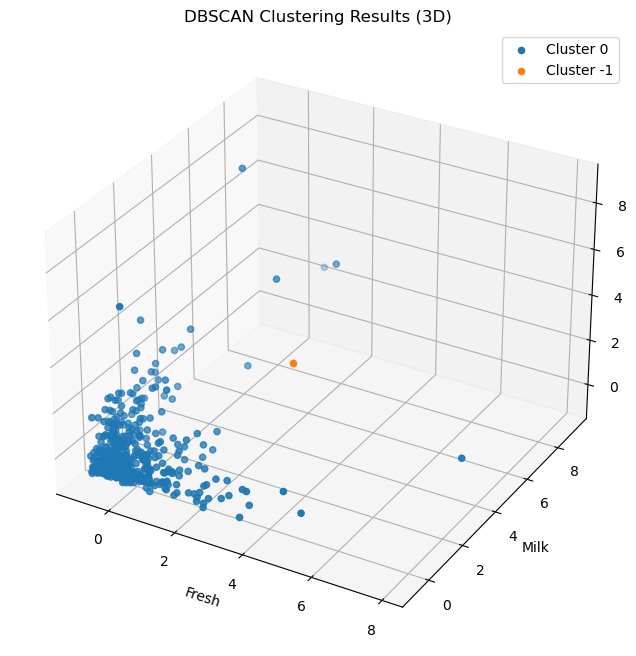

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_scaled and clusters are available
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for dbscan_cluster in set(clusters):
    # get data points that fall in this cluster
    index = np.where(clusters == dbscan_cluster)
    # make the 3D plot
    ax.scatter(df_scaled[index, 2], df_scaled[index, 3], df_scaled[index, 4], label=f'Cluster {dbscan_cluster}')

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.set_title('DBSCAN Clustering Results (3D)')
plt.legend()
plt.show()


In [14]:
from sklearn import metrics
sc = metrics.silhouette_score(df_scaled, clusters)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.83


### We have got the Silhouette cofficient as 0.83 which is very good, indicating distinct, well-separated clusters were found.
### It implies the clustering model successfully identified real groups in the data based on the product categories.Stores with similar purchasing patterns are clustered together cleanly.